In [20]:
import numpy as np
import matplotlib.pyplot as plt
import plotutils as pu
import sympy
%matplotlib inline

Our goal is to produce noise in $n$ dimensions where $1 \le n$. In practical terms we'll not be able to produce noise in infinite dimensions but at least we will consider our algorithms as such we might someday. For this to work the input to our noise function will have to be a vector that describes a point in abstract vector space. We will call this point $x$ from now on. Formally, it is a vector of $n$ components $(A_1, A_2, \ldots, A_n)$.

So we could write $f(\vec{x}) = y$. Note that $x$ here is not some point along the x-axis. It's a vector of $n$ components that specifies some point in abstract n-dimensional vector space. However, when we are dealing with one-dimensional noise this *will* be a point along the x-axis. 

Also, we will add that we really would like $y$ to be in the range of $-1 \le y \le 1$. It's not a *strict* requirement for the noise function $f$ but it would be perfect. Another thing that's important is that our noise function *cannot* be random. If we feed it some point $p$ we should expect the outcome $y$ to be the same *every* time.

What we are looking for is sometimes known as *value noise* and it's basically a seemlingly random value $y$ mapped to some point $p$ in n-dimensional space. 

We'll start with a function that operates on *integer* $\mathbb{Z}$ coordinates first but we'll quickly look at expanding our range to *real* $\mathbb{R}$ coordinates as well. For now, we'll start with a function $f_0(\vec{p}) = n$ where $\vec{p}$ is a scalar (a vector with one component, so basically just a number) and we'll shoot for $-1 \le n \le 1$.

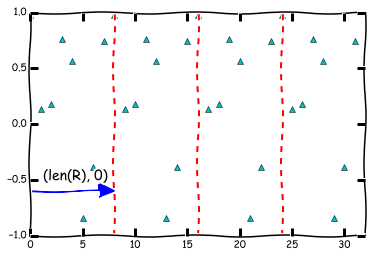

In [82]:
R = np.random.ranf(8) * 2 - 1
f_0 = lambda p: R[p % len(r)]
x = np.arange(0, 32, 1)
with plt.xkcd():
    plt.xlim(0, 32)
    plt.plot(x, f_0(x), 'c^')
    plt.plot([8, 8], [-1, 1], 'r--')
    plt.plot([16, 16], [-1, 1], 'r--')
    plt.plot([24, 24], [-1, 1], 'r--')
    plt.arrow(0, -0.6, 8, 0, head_length=1.4, head_width=0.12, length_includes_head=True, fc='b', ec='b')
    plt.annotate('(len(R), 0)', (1.2, -0.5))